In [4]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━

In [1]:
import pandas as pd
# Load dataset
df = pd.read_csv("/content/cleaned_test.csv")

In [2]:
# Define features and target
X = df.drop(columns=["outlet_city", "Customer_ID"])

In [5]:
import pickle

# Loading the saved model using pickle
model_filename = '/content/final_model_ebm.pkl'
with open(model_filename, 'rb') as f:
    loaded_model = pickle.load(f)
    print(f"🔹 Model loaded from {model_filename}")

🔹 Model loaded from /content/final_model_ebm.pkl


In [6]:
# Make predictions with the loaded model
cluster_category = loaded_model.predict(X)

In [7]:
# Add predictions as a new column to the new dataset
predictions = pd.DataFrame(df, columns=['Customer_ID', 'outlet_city', 'city_encoded','luxury_sales','fresh_sales','dry_sales'])
predictions['cluster_category'] = cluster_category

In [8]:
# Display the new data with predictions
print(predictions.head())

   Customer_ID outlet_city  city_encoded  luxury_sales  fresh_sales  \
0        33574  Batticaloa             2      0.038426     0.002223   
1        10089  Batticaloa             2      0.245845     0.186452   
2        38329  Batticaloa             2      0.122227     0.089708   
3        11376  Batticaloa             2      0.234473     0.167912   
4        12410  Batticaloa             2      0.148718     0.109754   

   dry_sales  cluster_category  
0   0.008710                 1  
1   0.684450                 5  
2   0.376731                 2  
3   0.672568                 5  
4   0.393648                 2  


In [9]:
# Remove rows with these outlier indexes
final_predictions = predictions[["Customer_ID", "cluster_category"]]
final_predictions.head()

,Customer_ID,cluster_category
0,33574,1
1,10089,5
2,38329,2
3,11376,5
4,12410,2


In [10]:
from google.colab import files
final_predictions.to_csv('final_cluster_predictions.csv', index=False)  # Save file
files.download('final_cluster_predictions.csv')  # Download to local machine

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
unique_cluster_categories = final_predictions['cluster_category'].unique()
unique_cluster_categories


array([1, 5, 2, 4, 6, 3])

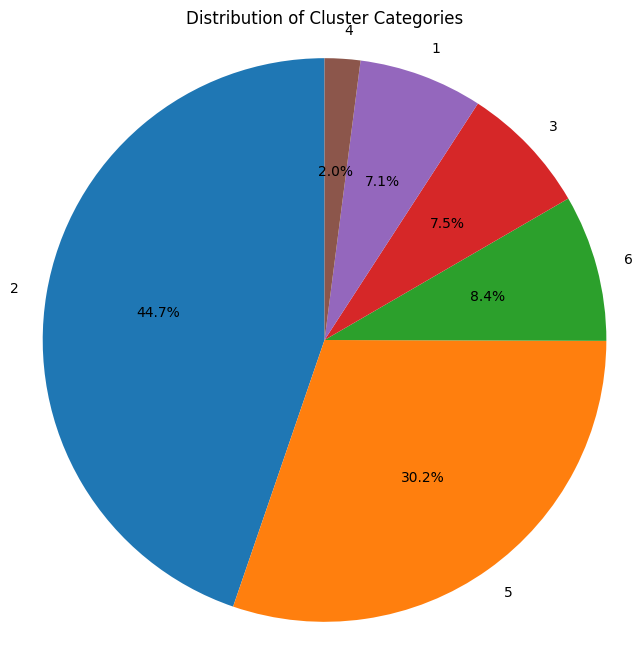

In [12]:
import matplotlib.pyplot as plt

# Count the occurrences of each cluster category
cluster_counts = final_predictions['cluster_category'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cluster Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
